In [0]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [0]:
import os
import numpy as np
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt
from tqdm import tqdm
from keras.preprocessing.sequence import pad_sequences

Using TensorFlow backend.


### Проверим корректность чтения wav фалов

In [0]:
rate, signal = wav.read('./data/OAF_dab_happy.wav')

In [0]:
wav.read??

In [0]:
rate, signal.shape, signal 

(24414, (46152,), array([ 0,  0, -1, ...,  3,  3, -2], dtype=int16))

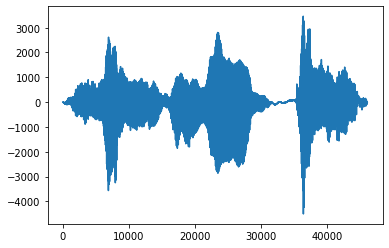

In [0]:
x = np.arange(signal.shape[0])
plt.plot(x, signal)

In [0]:
signal_mean, signal_std = signal.mean(), signal.std()
signal_mean, signal_std

(2.172430230542555, 648.5939964666352)

In [0]:
standart_signal = (signal.copy() - signal_mean) / signal_std
standart_signal.mean(), standart_signal.std()

(-2.155399181106215e-18, 1.0)

In [0]:
standart_signal_reshaped = standart_signal.copy().reshape((standart_signal.shape[0], 1))
standart_signal_reshaped

array([[-0.00334945],
       [-0.00334945],
       [-0.00489124],
       ...,
       [ 0.00127594],
       [ 0.00127594],
       [-0.00643304]])

### Загружаем и подгатавливаем данные

In [0]:
# DATASET_PATH = 'data/'
DATASET_PATH = '/content/drive/My Drive/data/'

def _get_end_of(file_name):
    return file_name.split('_')[-1].split('.')[0]

def read_data():
    labels_to_classes = {'happy': 0, 'sad': 1, 'angry': 2, 'neutral': 3, 
                         'disgust': 4, 'fear': 5, 'ps': 6}
    signals, classes = [], []
    maxlen = -np.inf
    for file_name in tqdm(os.listdir(DATASET_PATH)):
        label = _get_end_of(file_name)
        if label in labels_to_classes.keys():
            try:
                rate, signal = wav.read(DATASET_PATH + file_name)
            except:
                print(file_name)
            maxlen = max(maxlen, len(signal))
            class_ = labels_to_classes[label]
            signals.append(signal), classes.append(class_)
        else:
            print('Unknown label: ', label)
    return pad_sequences(signals, maxlen=maxlen), np.array(classes), maxlen

In [4]:
signals, classes, maxlen = read_data()
signals.shape

 14%|█▍        | 390/2822 [01:36<16:08,  2.51it/s]

YAF_germ_angry.wav


 18%|█▊        | 517/2822 [02:28<13:48,  2.78it/s]

Unknown label:  fear (1)


 34%|███▍      | 962/2822 [05:33<12:12,  2.54it/s]

Unknown label:  ps (1)


 34%|███▍      | 969/2822 [05:36<11:26,  2.70it/s]

Unknown label:  fear (1)


 41%|████      | 1148/2822 [06:47<10:12,  2.73it/s]/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: WavFileWarning: Reached EOF prematurely; finished at 57344 bytes, expected 101730 bytes from header.
  from ipykernel import kernelapp as app
 52%|█████▏    | 1458/2822 [08:55<08:32,  2.66it/s]

Unknown label:  happy (1)


 52%|█████▏    | 1460/2822 [08:56<07:21,  3.09it/s]

Unknown label:  neutral (1)
Unknown label:  sad (1)
Unknown label:  ps (1)
Unknown label:  neutral (1)
Unknown label:  happy (1)
Unknown label:  disgust (1)


 52%|█████▏    | 1467/2822 [08:56<05:31,  4.09it/s]

Unknown label:  neutral (1)
Unknown label:  happy (1)


 53%|█████▎    | 1483/2822 [09:02<08:29,  2.63it/s]

Unknown label:  ps (1)


 57%|█████▋    | 1596/2822 [09:49<08:12,  2.49it/s]/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: WavFileWarning: Reached EOF prematurely; finished at 57344 bytes, expected 104306 bytes from header.
  from ipykernel import kernelapp as app
 62%|██████▏   | 1753/2822 [10:51<06:59,  2.55it/s]/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: WavFileWarning: Reached EOF prematurely; finished at 40960 bytes, expected 98706 bytes from header.
  from ipykernel import kernelapp as app
 81%|████████  | 2290/2822 [14:35<03:32,  2.50it/s]

YAF_neat_fear.wav


 91%|█████████ | 2559/2822 [16:26<01:56,  2.25it/s]

Unknown label:  disgust (1)
Unknown label:  fear (1)
Unknown label:  neutral (1)


 91%|█████████ | 2563/2822 [16:26<01:27,  2.95it/s]

Unknown label:  happy (1)
Unknown label:  disgust (1)
Unknown label:  fear (1)
Unknown label:  happy (1)
Unknown label:  angry (1)
Unknown label:  sad (1)


100%|██████████| 2822/2822 [18:12<00:00,  2.31it/s]


(2800, 145172)

In [5]:
np.unique(classes)

array([0, 1, 2, 3, 4, 5, 6])

In [6]:
signals_reshaped = signals.copy().reshape((signals.shape[0], signals.shape[1], 1))
signals_reshaped.shape

(2800, 145172, 1)

In [0]:
np.save('signals_reshaped.npy', signals_reshaped)
np.save('classes.npy', classes)

In [85]:
signals_reshaped_60k = signals_reshaped[:, -60_000:]
signals_reshaped_60k.shape

(2800, 60000, 1)

In [86]:
i=0
print(classes[i])
print(signals[i])
print(signals_reshaped[i])
print(signals_reshaped_60k[i])

5
[ 0  0  0 ... 19 17  6]
[[ 0]
 [ 0]
 [ 0]
 ...
 [19]
 [17]
 [ 6]]
[[ 0]
 [ 0]
 [ 0]
 ...
 [19]
 [17]
 [ 6]]


In [0]:
from sklearn.model_selection import train_test_split

(signals_reshaped_train, signals_reshaped_test,
 classes_train, classes_test) = train_test_split(signals_reshaped_60k, classes, test_size=0.2, 
                                                 random_state=42, stratify=classes)

# (signals_reshaped_work, signals_reshaped_val,
#  classes_word, classes_val) = train_test_split(signals_reshaped_train, classes_train, test_size=0.2, 
#                                                random_state=42, stratify=classes_train)

### Обучаем и тестируем сеть

In [94]:
from keras.models import Sequential
from keras.layers import LSTM, Bidirectional, GRU, Flatten, Dense, AveragePooling1D, Dropout, MaxPooling1D

model = Sequential()
model.add(AveragePooling1D(128, input_shape = (None, 1), ))
# model.add(GRU(1))
# model.add(GRU(32, return_sequences=True, input_shape = (None, 1)))
model.add(GRU(128, return_sequences=True))
model.add(GRU(128, return_sequences=True))
model.add(GRU(64))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.2))
model.add(Dense(7, activation='softmax'))
model.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
average_pooling1d_21 (Averag (None, None, 1)           0         
_________________________________________________________________
gru_59 (GRU)                 (None, None, 128)         49920     
_________________________________________________________________
gru_60 (GRU)                 (None, None, 128)         98688     
_________________________________________________________________
gru_61 (GRU)                 (None, 64)                37056     
_________________________________________________________________
dropout_21 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_46 (Dense)             (None, 512)               33280     
_________________________________________________________________
dropout_22 (Dropout)         (None, 512)             

In [0]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [96]:
# query = np.in1d(classes_train, (0, 1, 2))

history = model.fit(signals_reshaped_train, classes_train, 
                    epochs=30, batch_size=64, validation_split=0.05)
#                     validation_data=(signals_reshaped_val, classes_val)) 

Train on 2128 samples, validate on 112 samples
Epoch 1/30
2128/2128 [==============================] - 53s 25ms/step - loss: 1.9550 - acc: 0.1668 - val_loss: 1.9059 - val_acc: 0.1339
Epoch 2/30
2128/2128 [==============================] - 45s 21ms/step - loss: 1.9185 - acc: 0.1997 - val_loss: 1.8402 - val_acc: 0.2232
Epoch 3/30
2128/2128 [==============================] - 45s 21ms/step - loss: 1.8356 - acc: 0.2707 - val_loss: 1.7742 - val_acc: 0.2500
Epoch 4/30
2128/2128 [==============================] - 45s 21ms/step - loss: 1.7037 - acc: 0.3078 - val_loss: 1.5000 - val_acc: 0.4196
Epoch 5/30
2128/2128 [==============================] - 46s 22ms/step - loss: 1.5185 - acc: 0.4018 - val_loss: 1.4487 - val_acc: 0.5179
Epoch 6/30
2128/2128 [==============================] - 45s 21ms/step - loss: 1.3727 - acc: 0.4643 - val_loss: 1.2373 - val_acc: 0.5268
Epoch 7/30
2128/2128 [==============================] - 45s 21ms/step - loss: 1.2264 - acc: 0.5221 - val_loss: 1.4443 - val_acc: 0.4732
E

In [97]:
# sum((model.predict(signals_reshaped_test) >= 0.5).T[0].astype(int) == classes_test) / len(classes_test)
(model.predict_classes(signals_reshaped_test) == classes_test).sum() / len(classes_test)

0.8857142857142857

In [0]:
'90.91%'

'90.91%'

30 30


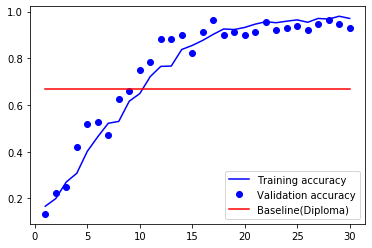

In [98]:
acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = np.arange(1, len(acc) + 1)
base_line = np.array((len(acc))*[0.67])
print(len(base_line), len(epochs))

plt.figure()

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'bo', label='Validation accuracy')
plt.plot(epochs, base_line, 'r', label='Baseline(Diploma)')

plt.legend()
plt.show()